In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [49]:
#  Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).
lat = []
lng = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

for city in cities:
    try:
        weatherURL = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}"
        response = requests.get(weatherURL).json()
        print(f"{city} {response['weather'][0]['id']}")
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except: 
        print(f"{city} not found.")


nizhniy tsasuchey 800
kodiak 804
punta arenas 802
atuona 804
jamestown 701
mar del plata 803
port hedland 800
butaritari 804
meadow lake 801
pangnirtung 801
albany 500
zhanakorgan 800
port elizabeth 800
rikitea 804
saint anthony 800
clyde river 601
ushuaia 802
tasiilaq 600
cherskiy 804
ilulissat 601
dzilam gonzalez 800
prince rupert 800
dikson 804
qaanaaq 800
bredasdorp 800
bethel 804
galle 500
port blair 803
bundaberg 802
saint-philippe 800
karratha 800
taolanaro not found.
thompson 803
ahipara 801
mataura 803
east london 801
mahon 801
caconda 804
hilo 800
bukama 500
kanpur 721
saskylakh 600
fairbanks 800
forestville 803
yar-sale 804
ponta do sol 801
the valley 803
jieshi 800
kamenka 803
cape town 800
kaitangata 802
codrington 803
russell 801
surt 803
saldanha 800
korla 804
vaini 801
aklavik 802
port alfred 800
tulagi 803
saebovik not found.
olafsvik 500
rawson 804
namatanai 500
yellowknife 801
dukat 802
mount isa 800
alpoyeca 800
sao jose da coroa grande 803
adrar 802
golovchino 803


In [3]:
#  Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

weather_df = {"Lat": lat,
             "Lng": lng,
             "Max Temp": maxTemp,
             "Humidity": humidity,
             "Cloudiness": cloudiness,
             "Wind Speed": windSpeed,
             "Country": country,
             "Date": date}
weather_df = pd.DataFrame(weather_df)
weather_df.to_csv('cityweather.csv', encoding='utf-8',index=False)
weather_df

NameError: name 'lat' is not defined

In [51]:
weather_df[weather_df['Humidity']>100]

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [52]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.00000,572.000000,572.000000,5.720000e+02
mean,20.562147,21.034010,59.507273,67.31993,52.459790,8.438374,1.618592e+09
std,33.518999,91.658759,23.518406,22.82970,37.573794,6.160675,7.620709e+01
min,-54.800000,-175.200000,-13.540000,5.00000,0.000000,0.250000,1.618591e+09
25%,-8.293400,-61.073075,44.697500,54.00000,19.000000,4.470000,1.618592e+09
50%,25.084350,26.138650,62.635000,71.00000,57.500000,7.020000,1.618592e+09
75%,50.242450,102.324125,79.000000,85.25000,90.000000,10.650000,1.618592e+09
max,78.218600,179.316700,107.310000,100.00000,100.000000,47.450000,1.618592e+09


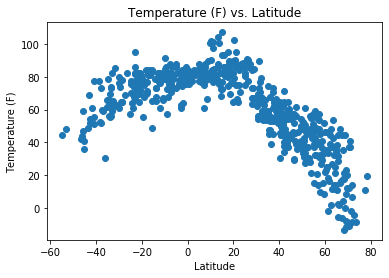

In [53]:
#Temperature vs. Latitude
temp = weather_df['Max Temp']
lat = weather_df['Lat']
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude")
plt.scatter(lat,temp)



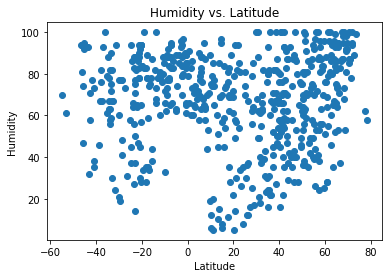

In [66]:
# Humidity vs. Latitude
humidity = weather_df['Humidity']
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude")
plt.scatter(lat,humidity)

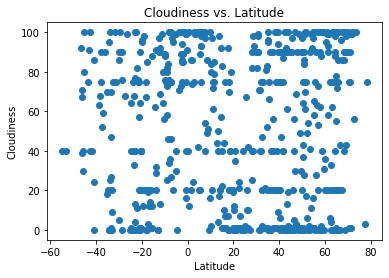

In [67]:
# Cloudiness vs. Latitude
cloudiness = weather_df['Cloudiness']
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude")
plt.scatter(lat, cloudiness)

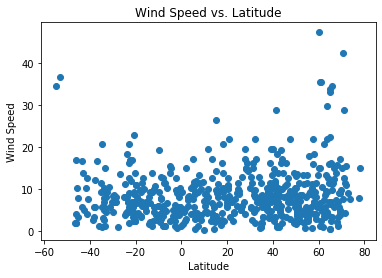

In [68]:
# Wind speed vs. Latitude
windSpeed = weather_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude")
plt.scatter(lat,windSpeed)

In [1]:
def regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq)
    plt.scatter(x_values,y_values)

In [2]:
# Northern Hemisphere - Temperature (F) vs. Latitude
northHem = weather_df[weather_df['Lat']>= 0]
northHemLat = northHem['Lat']
northHemTemp = northHem['Max Temp']
regression(northHemLat,northHemTemp)
plt.xlabel("Latitude")
plt.ylabel("Northern Hemisphere - Temperature (F)")
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.scatter(northHemLat,northHemTemp)

NameError: name 'weather_df' is not defined

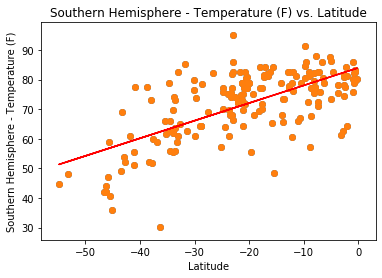

In [71]:
# Southern Hemisphere - Temperature (F) vs. Latitude
southHem = weather_df[weather_df['Lat']< 0]
southHemLat = southHem["Lat"]
southHemTemp = southHem["Max Temp"]
regression(southHemLat,southHemTemp)
plt.xlabel("Latitude")
plt.ylabel("Southern Hemisphere - Temperature (F)")
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.scatter(southHemLat,southHemTemp)

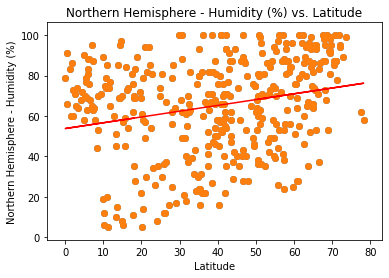

In [72]:
# Northern Hemisphere - Humidity (%) vs. Latitude
northHemHum = northHem['Humidity']
regression(northHemLat,northHemHum)
plt.xlabel("Latitude")
plt.ylabel("Northern Hemisphere - Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.scatter(northHemLat,northHemHum)


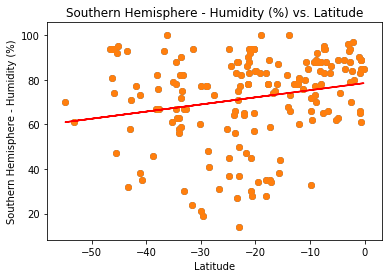

In [74]:
# Southern Hemisphere - Humidity (%) vs. Latitude
southHemHum = southHem['Humidity']
regression(southHemLat,southHemHum)
plt.xlabel("Latitude")
plt.ylabel("Southern Hemisphere - Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.scatter(southHemLat,southHemHum)

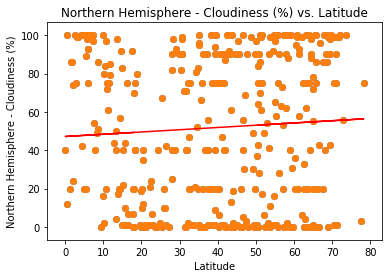

In [75]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
northHemCloud = northHem["Cloudiness"]
regression(northHemLat,northHemCloud)
plt.xlabel("Latitude")
plt.ylabel("Northern Hemisphere - Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.scatter(northHemLat,northHemCloud)

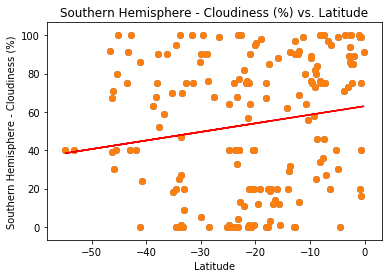

In [76]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
southHemCloud = southHem["Cloudiness"]
regression(southHemLat,southHemCloud)
plt.xlabel("Latitude")
plt.ylabel("Southern Hemisphere - Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.scatter(southHemLat,southHemCloud)


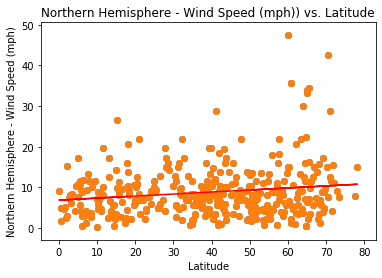

In [77]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
northHemWind = northHem["Wind Speed"]
regression(northHemLat,northHemWind)
plt.xlabel("Latitude")
plt.ylabel("Northern Hemisphere - Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph)) vs. Latitude")
plt.scatter(northHemLat,northHemWind)


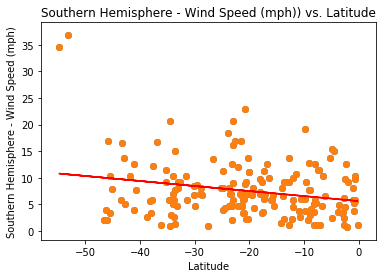

In [78]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
southHemWind = southHem['Wind Speed']
regression(southHemLat,southHemWind)
plt.xlabel("Latitude")
plt.ylabel("Southern Hemisphere - Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph)) vs. Latitude")
plt.scatter(southHemLat,southHemWind)


In [ ]:
#Observable trends
# 1. Max temperature increases closer to the equator.
# 2. There is no correlation between cloudiness and latitude
# 3. Wind speed is consistent between lattitudes and increases at the highest and lowest lattitude.